# Predicting heart disease using machine learning
* Preparing the tools

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
jtplot.figsize()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import plot_roc_curve, confusion_matrix

In [5]:
df = pd.read_csv('./Data/6.1 heart-disease.csv')
df.shape

(303, 14)

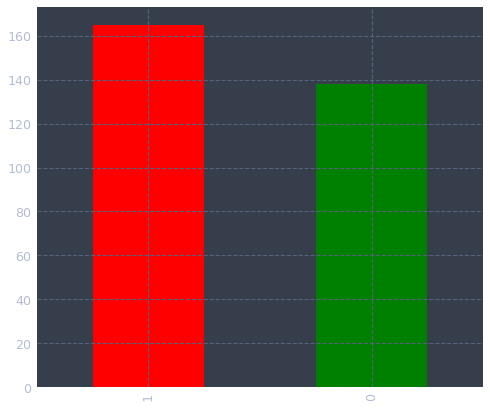

In [6]:
# Data Exploration (Explantory data analysis or EDA)
df['target'].value_counts().plot(kind = 'bar', color = ['red', 'green']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


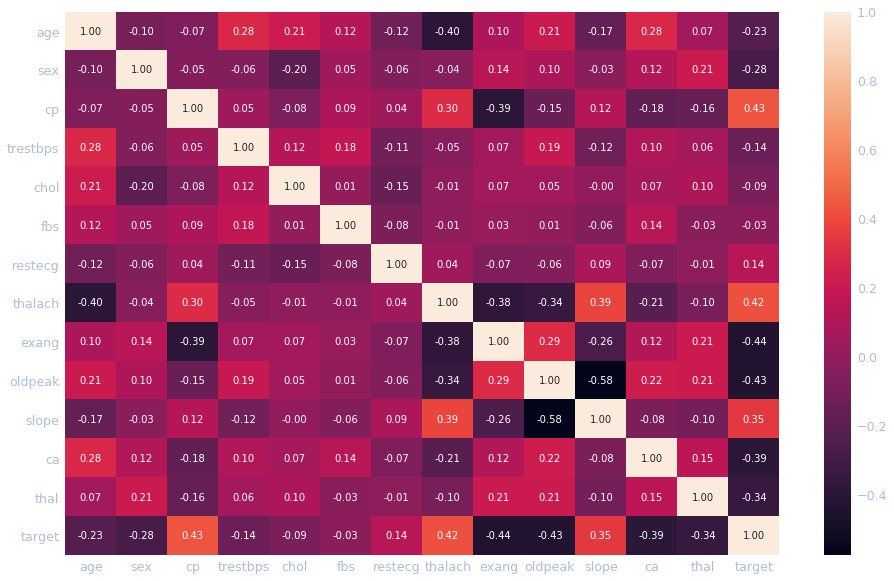

In [10]:
# Correlation matrix
# using seaborn' s heatmap to better visualize the Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (16, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                fmt = '.2f',
                );

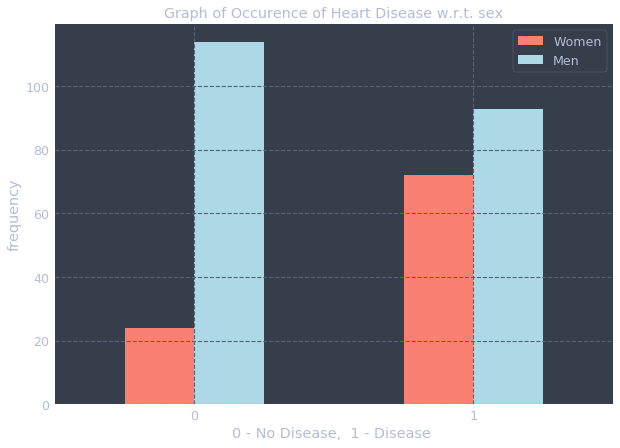

In [11]:
# Comparing the sex to the target column
pd.crosstab(df['target'], df['sex']).plot(kind = 'bar',
                                         figsize = (10, 7),
                                         color = ['salmon', 'lightblue'])
plt.title('Graph of Occurence of Heart Disease w.r.t. sex')
plt.xlabel('0 - No Disease,  1 - Disease ')
plt.ylabel('frequency')
plt.xticks(rotation = 0)
plt.legend(['Women', 'Men']);

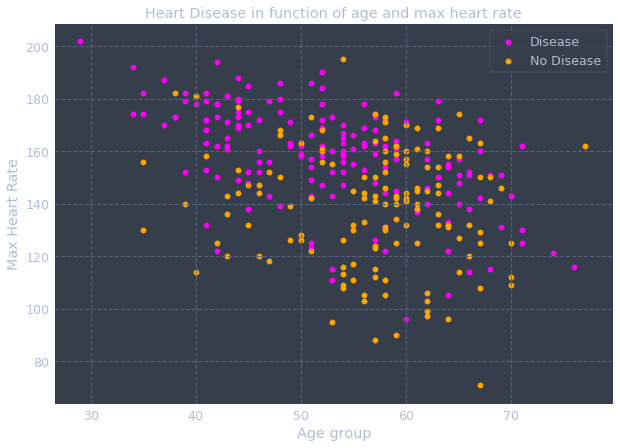

In [12]:
# Comparing age and max heart rate with the target
plt.figure(figsize = (10, 7))
# selecting the positive cases for age, and max heart rate column
plt.scatter(df.age[df['target'] == 1],
             df.thalach[df['target'] == 1], color = ['magenta'])
# selecting the negative cases now,
plt.scatter(df.age[df['target'] == 0],
            df.thalach[df['target'] == 0], color = ['orange'])
plt.xlabel('Age group')
plt.ylabel('Max Heart Rate')
plt.title("Heart Disease in function of age and max heart rate")
plt.legend(['Disease', 'No Disease']);

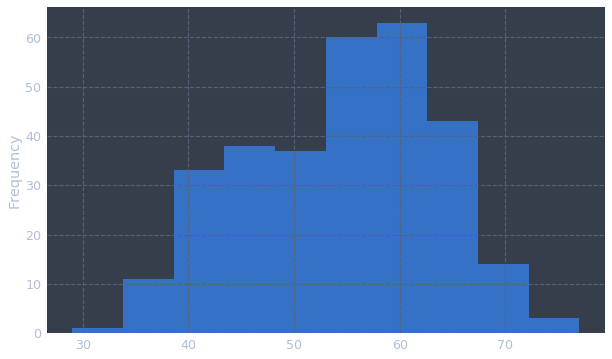

In [13]:
# Checking th e distribution of age (spread of age)
df['age'].plot.hist(figsize = (10, 6));
# the curve shows majority of the people are in the 50-60 age group

## Modelling


In [14]:
x = df.drop('target', axis=1)
y = df['target']

In [15]:
np.random.seed(26)
xTrain ,xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}
# Create the function to fit and score models:
def fit_and_score(models, xTrain, xTest, yTrain, yTest):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of scikit-learn machine learning models
    '''
    np.random.seed(25)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop on all models to fit the data and then store all the score in model_score dictionary
    for name, model in models.items():
        model.fit(xTrain, yTrain)
        model_scores[name] = model.score(xTest, yTest)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models, xTrain=xTrain, xTest=xTest, yTrain=yTrain, yTest=yTest)
model_scores

/home/shubhi3199/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.7213114754098361,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.7704918032786885}

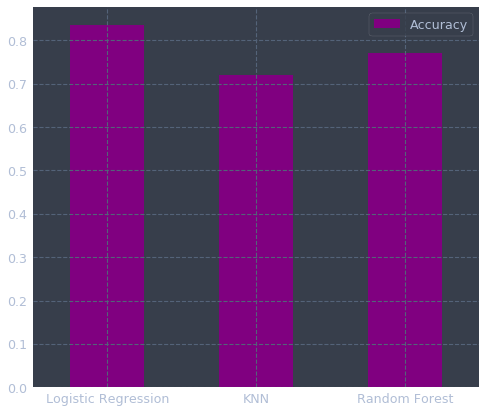

In [18]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare.T.plot(kind = 'bar', color = 'purple');
plt.xticks(rotation = 0);

### Now we've got a baseline model ... now to improve upon it :
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve

In [19]:
# Hyperparameter Tuning on KNN:
train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(xTrain, yTrain)
    train_scores.append(knn.score(xTrain, yTrain))
    test_scores.append(knn.score(xTest, yTest))

In [20]:
list(neighbors)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [21]:
test_scores

[0.639344262295082,
 0.5737704918032787,
 0.6721311475409836,
 0.6229508196721312,
 0.7213114754098361,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6229508196721312,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853]

The accuracy of the hyperparameter tunned KNN model is: 72.13%


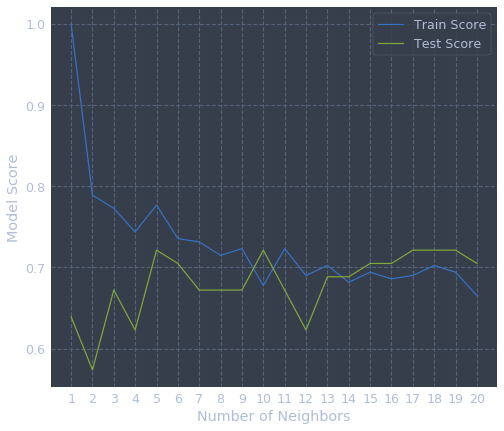

In [22]:
plt.plot(neighbors, train_scores)
plt.plot(neighbors, test_scores)
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend(['Train Score', 'Test Score']);
print(f'The accuracy of the hyperparameter tunned KNN model is: {max(test_scores)*100:.2f}%')

In [23]:
models.items()


dict_items([('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('Random Forest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100

## Hyperparameter Tuning with RandomizedSearchCV On :
* LogisticRegression()
* RandomForestClassifier()

In [24]:
# Creating hyperparameter grid for LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}
# Creating hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [25]:
np.random.seed(34)
# Set up Random hyperparameter search model for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
# Fit hyperparameter search model for LogisticRegression
rs_log_reg.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [26]:
rs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [27]:
rs_log_reg.score(xTrain, yTrain)

0.8636363636363636

In [28]:
# Now we tune the RandomForestClassifier model
np.random.seed(23)
# Setting up the hyperparameter tunned RandomForestClassifier model
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
# Fitting the tunned RandomForestClassifier model
rs_rf.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 14,
 'n_estimators': 260}

In [30]:
rs_rf.score(xTest, yTest)

0.8032786885245902

## Hyperparameter tuning with GridSearchCV:


In [31]:
# On LogisticRegression :
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}
np.random.seed(46)
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)
# Fit the tunned model:
gs_log_reg.fit(xTrain, yTrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [32]:
gs_log_reg.score(xTest, yTest)

0.7868852459016393

In [37]:
# On RandomForestClassifier :
rf_grid = {
    'n_estimators': np.arange(150, 500, 50),
    'max_depth': [None],
    'min_samples_split': np.arange(8, 18, 2),
    'min_samples_leaf': np.arange(5, 13, 2)
}
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)
gs_rf.fit(xTrain, yTrain)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [38]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 7,
 'min_samples_split': 16,
 'n_estimators': 450}

In [39]:
gs_rf.score(xTest, yTest)

0.819672131147541

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion Matrix
* Precision
* Recall
* F1 score
* Classification Report

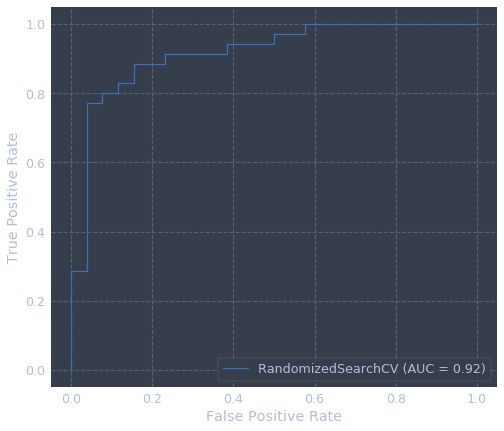

In [33]:
plot_roc_curve(rs_log_reg, xTest, yTest);

In [34]:
y_preds = rs_log_reg.predict(xTest)
confusion_matrix(yTest, y_preds)

array([[16, 10],
       [ 3, 32]])

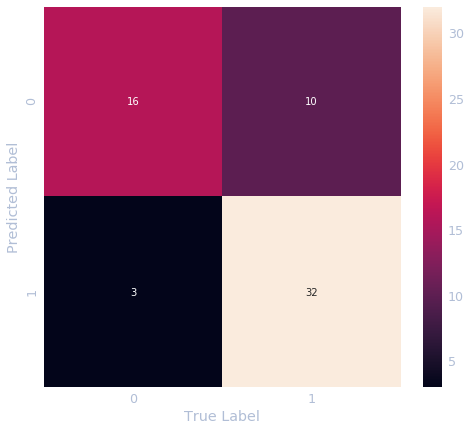

In [35]:
def plot_conf_matrix(yTest, y_preds):
    ''' 
    Plots a nice looking seaborn heatmap for our confusion matrix
    '''
    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(yTest, y_preds), 
                     annot = True,
                     )
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
    
plot_conf_matrix(yTest, y_preds)
     

In [36]:
print(classification_report(yTest, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.76      0.91      0.83        35

    accuracy                           0.79        61
   macro avg       0.80      0.76      0.77        61
weighted avg       0.80      0.79      0.78        61



# Evaluation Metrics using Cross validation


In [48]:
# Recreate the classifier with best hyperparameters
clf = LogisticRegression(C = 0.08858667904100823, solver = 'liblinear')
clf.fit(xTrain, yTrain)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [39]:
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8182683982683983

In [40]:
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [41]:
cv_f1_score = cross_val_score(clf, x, y, cv = 5, scoring = 'f1')
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8572876223964057

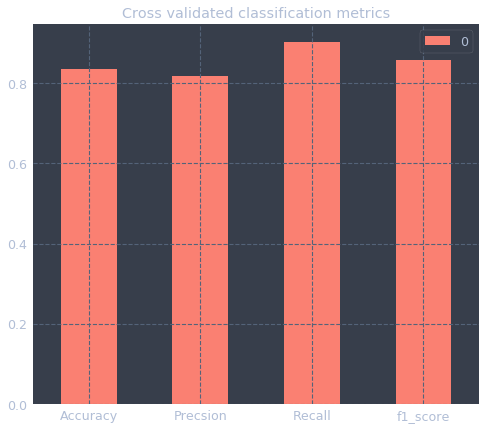

In [42]:
# visualizing the cross validated metrics:
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precsion': cv_precision,
    'Recall': cv_recall,
    'f1_score': cv_f1_score
}, index = [0])
cv_metrics.T.plot.bar(color = 'salmon')
plt.title('Cross validated classification metrics');
plt.xticks(rotation = 0);

## Feature Importance
* Every model has it's own way of finding the most important features: 

In [52]:
list(clf.coef_[0])

[0.010089120566088941,
 -0.5581397428408371,
 0.5899822333996194,
 -0.014381237200113473,
 -0.002582345598921062,
 -0.06961169895134985,
 0.188673905457985,
 0.02473929453898614,
 -0.385955538623745,
 -0.522116770118408,
 0.1846464985727439,
 -0.5785430347380491,
 -0.43617576651619944]

In [54]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.010089120566088941,
 'ca': -0.5785430347380491,
 'chol': -0.002582345598921062,
 'cp': 0.5899822333996194,
 'exang': -0.385955538623745,
 'fbs': -0.06961169895134985,
 'oldpeak': -0.522116770118408,
 'restecg': 0.188673905457985,
 'sex': -0.5581397428408371,
 'slope': 0.1846464985727439,
 'thal': -0.43617576651619944,
 'thalach': 0.02473929453898614,
 'trestbps': -0.014381237200113473}

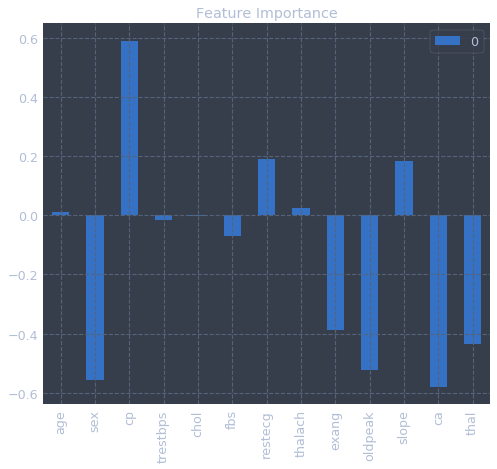

In [57]:
# Visualizing Feature Importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance')